Fitting 5 folds for each of 54 candidates, totalling 270 fits

=== Mejores hiperparámetros encontrados ===
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 30}
F1-score macro (validación interna): 0.9719

=== Reporte de Clasificación===
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.88      0.98      0.93        58
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.97      1.00      0.98        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



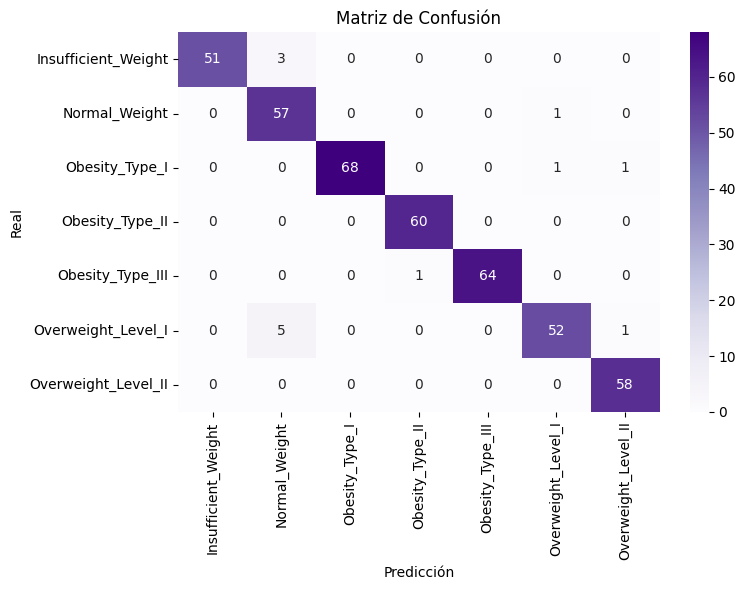

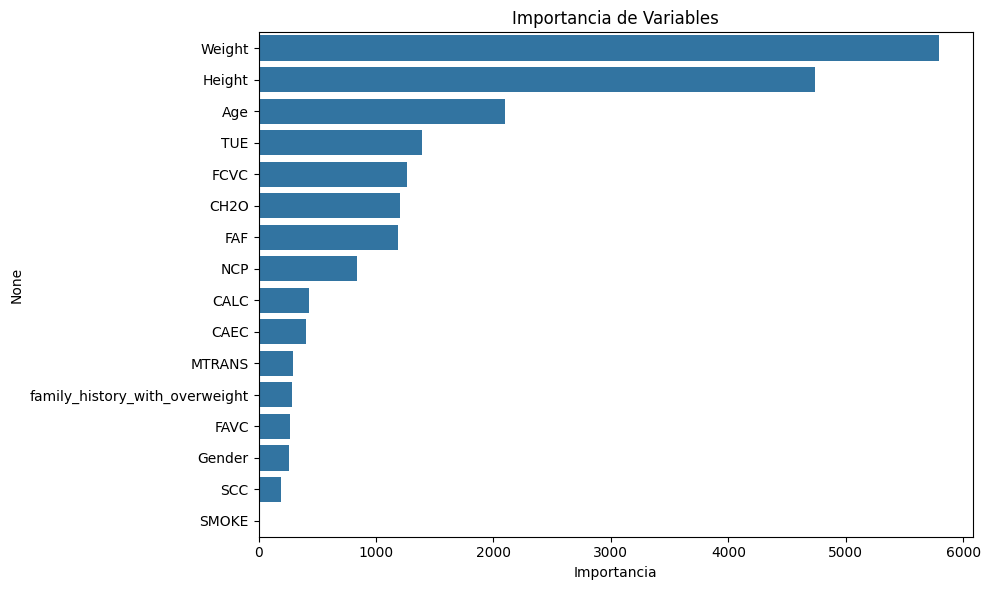

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from lightgbm import LGBMClassifier

# Cargar datos
df = pd.read_excel('data/ObesityDataSet_raw_and_data_sinthetic.xlsx')
objetivo = 'NObeyesdad'
X = df.drop(columns=[objetivo])
y = df[objetivo]

# Codificación de variables categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
le_objetivo = LabelEncoder()
y_encoded = le_objetivo.fit_transform(y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Definir modelo base
base_model = LGBMClassifier(
    objective='multiclass',
    num_class=len(le_objetivo.classes_),
    verbosity=-1
)

# Hiperparámetros a explorar
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 6, 10]
}

# Búsqueda de hiperparámetros
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Ajustar modelo
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Predicciones sobre conjunto de prueba
y_pred = best_model.predict(X_test)

# Mostrar mejores parámetros
print("\n=== Mejores hiperparámetros encontrados ===")
print(grid.best_params_)
print(f"F1-score macro (validación interna): {grid.best_score_:.4f}")

# Reporte de clasificación
print("\n=== Reporte de Clasificación===")
print(classification_report(y_test, y_pred, target_names=le_objetivo.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le_objetivo.classes_,
            yticklabels=le_objetivo.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de variables
importancia = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia.values, y=importancia.index)
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Mejor combinación de hiperparámetros ===
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
F1-score macro (validación interna): 0.9684

=== Reporte de Clasificación ===
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.91      0.93        54
      Normal_Weight       0.85      0.95      0.89        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.91      0.95        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



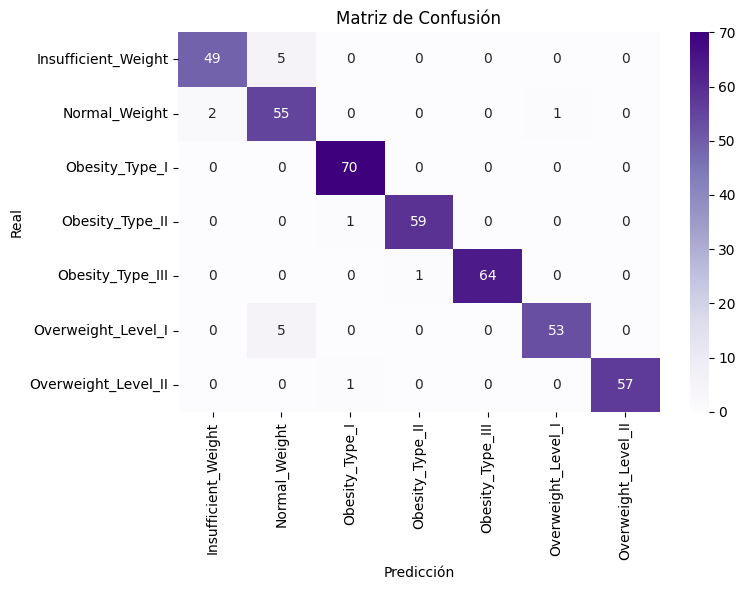

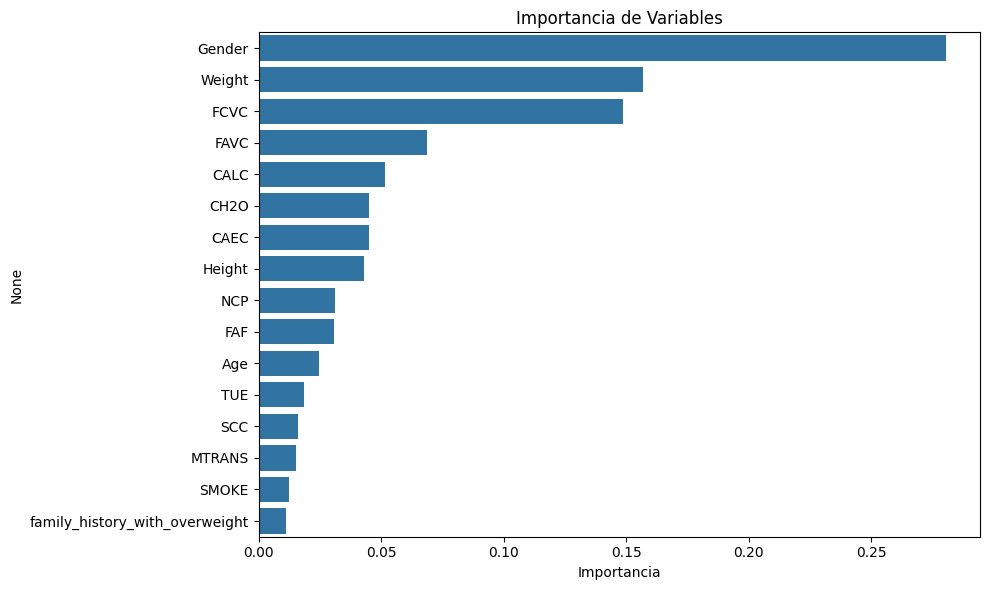

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score
)
from xgboost import XGBClassifier

# Cargar datos
df = pd.read_excel('data/ObesityDataSet_raw_and_data_sinthetic.xlsx')
objetivo = 'NObeyesdad'
X = df.drop(columns=[objetivo])
y = df[objetivo]

# Codificación
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
le_objetivo = LabelEncoder()
y_encoded = le_objetivo.fit_transform(y)

# División de datos para evaluación final
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Modelo base
base_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_objetivo.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)

# Hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8]
}

# Búsqueda de hiperparámetros con GridSearchCV
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Evaluación sobre test
y_pred = best_model.predict(X_test)
print("\n=== Mejor combinación de hiperparámetros ===")
print(grid.best_params_)
print(f"F1-score macro (validación interna): {grid.best_score_:.4f}")

print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred, target_names=le_objetivo.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le_objetivo.classes_,
            yticklabels=le_objetivo.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de variables
importancia = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia.values, y=importancia.index)
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()
